In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pvlib as pvl
from pvmismatch import *

sns.set(font_scale=1.5, rc={'figure.figsize': (12, 8)})

In [2]:
pvconst = pvconstants.PVconstants(npts=1001)

pvstr0 = pvstring.PVstring(pvconst=pvconst, numberMods=2)
pvstr = pvstring.PVstring(pvconst=pvconst, numberMods=2)

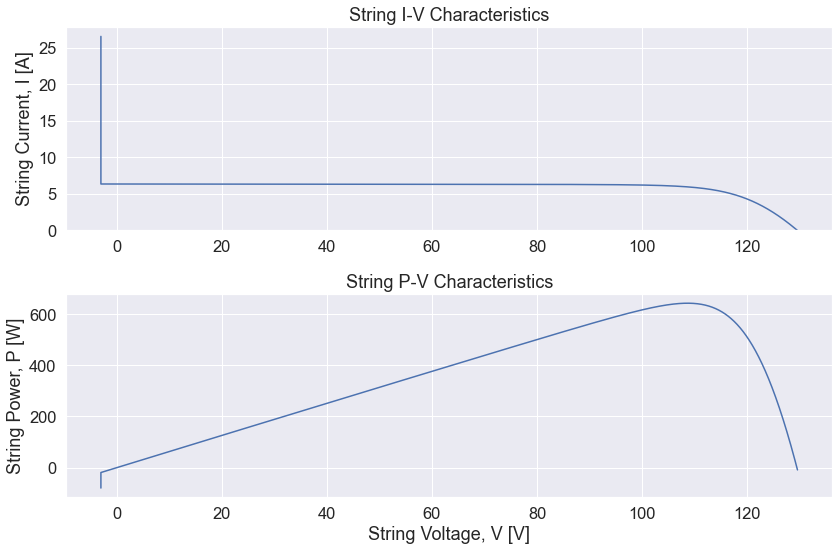

In [3]:
fax = pvstr.plotStr()
fax.axes[0].grid()
fax.axes[1].grid()
fax.tight_layout()

In [4]:
pvstr.setSuns({1: {'cells': [9, 10, 11, 12, 13, 14, 15, 23, 24, 25, 26, 35, 36], 'Ee': 0.1}})

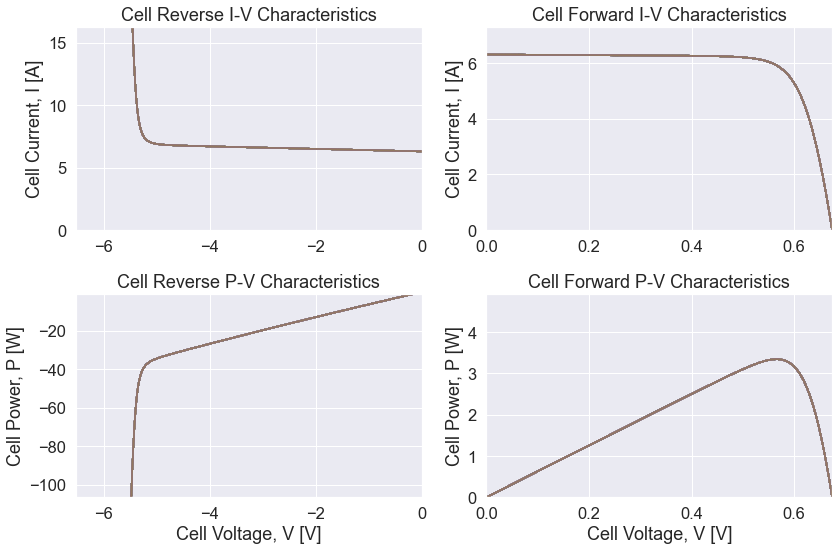

In [5]:
pvmod0 = pvstr.pvmods[0]
print(pvmod0)
f = pvmod0.plotCell();
for a in f.axes: a.grid()
f.tight_layout()

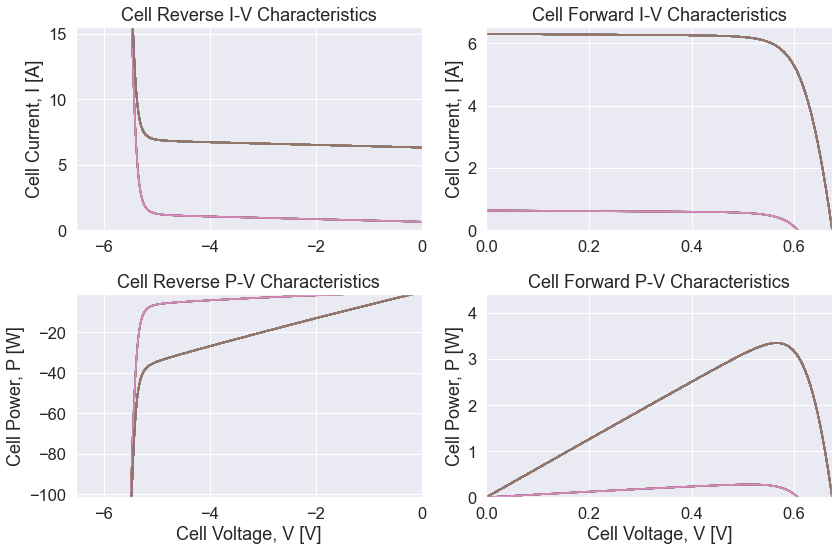

In [6]:
pvmod1 = pvstr.pvmods[1]
print(pvmod1)
f = pvmod1.plotCell();
for a in f.axes: a.grid()
f.tight_layout()

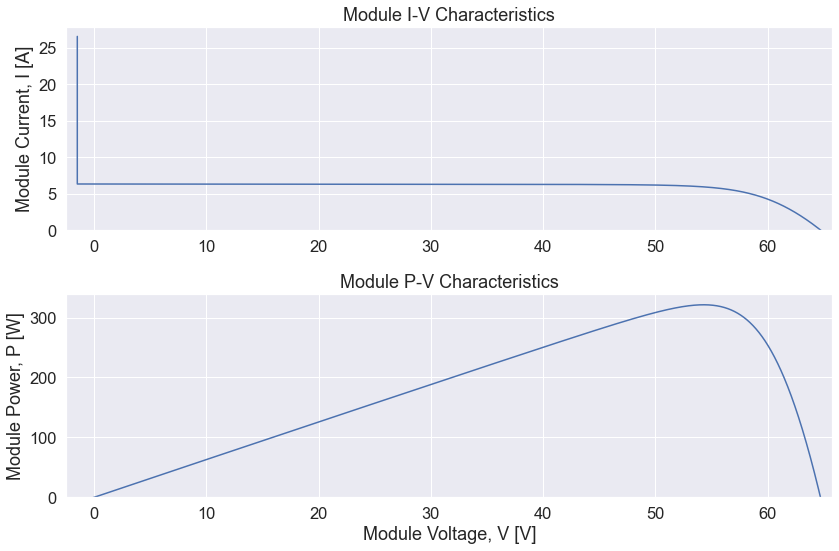

In [7]:
f = pvmod0.plotMod();
for a in f.axes: a.grid()
f.tight_layout()

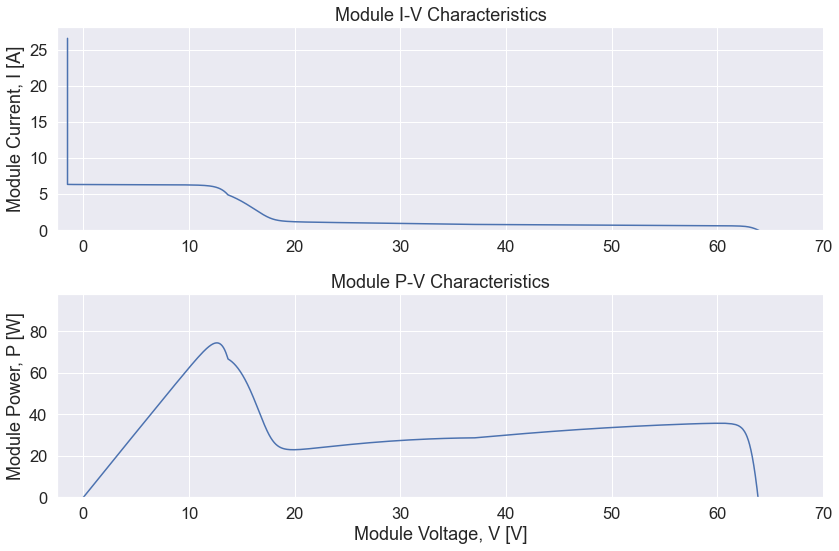

In [8]:
f = pvmod1.plotMod();
for a in f.axes: a.grid()
f.tight_layout()

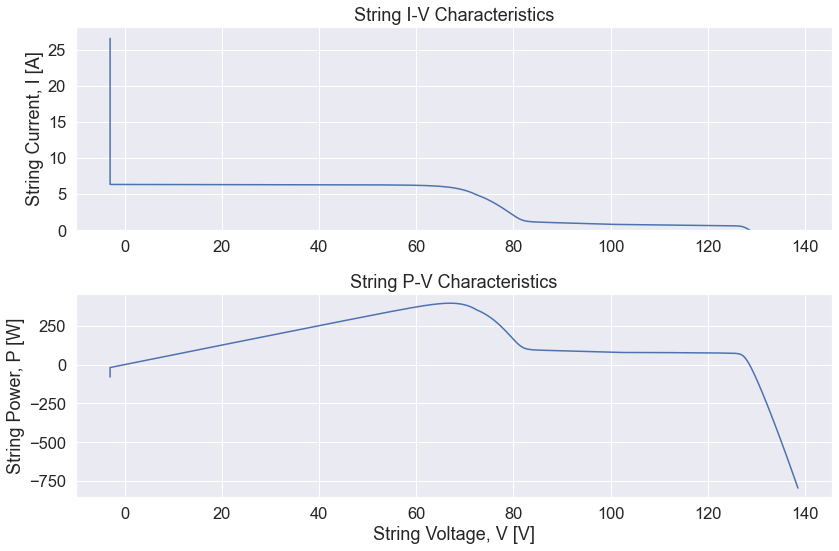

In [9]:
fax = pvstr.plotStr()
fax.axes[0].grid()
fax.axes[1].grid()
fax.tight_layout()

In [10]:
# power of unshaded string
Pmp0 = pvstr0.Pstring.max()
Pmp0

642.5624325725747

In [11]:
# max power point of unshaded string
mpp0 = np.argmax(pvstr0.Pstring)
Imp0, Vmp0 = pvstr0.Istring[mpp0], pvstr0.Vstring[mpp0]
Imp0, Vmp0

(5.915258855608845, 108.62794820268896)

In [12]:
# power of SHADED string - wouldn't be able to operate here w/o DC optimizer!
Pmp = pvstr.Pstring.max()
Pmp

395.6880786605177

In [13]:
# MPP of shaded string, note that voltage is 13[V] lower!
mpp = np.argmax(pvstr.Pstring)
Imp, Vmp = pvstr.Istring[mpp], pvstr.Vstring[mpp]
Imp, Vmp

(5.911764827546784, 66.9323104357514)

In [14]:
# not iterate to get current of string of 34 modules (17 pairs)
dcopt_loss = 0.005  # 0.5%
vfixed = 1500  # [V]
number_dcopt = 10
i_fixed = (Pmp + (number_dcopt-1)*Pmp0)*(1-dcopt_loss)/(vfixed)

In [15]:
# now use sandia grid-connected inverter at this condition:
output = i_fixed, vfixed, (Pmp + (number_dcopt-1)*Pmp0)*(1-dcopt_loss), i_fixed*vfixed
print(
    f'current\t\t\t= {output[0]:g} [A]\n'
    f'voltage \t\t= {output[1]:g}  [V]\n'
    f'power into inverter\t= {output[2]:g} [W] (after DC optimizer loss)')
print(f'check: {output[3]}')

current			= 4.09857 [A]
voltage 		= 1500  [V]
power into inverter	= 6147.86 [W] (after DC optimizer loss)
check: 6147.856221954622
